In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Rice-Mele Model
$$
    \hat{H}_\text{RM}=\hat{H}_\text{alt}+u\sum_{n}\left(\ket{n,A}\bra{n,A}-\ket{n,B}\bra{n,B}\right)
$$

In [2]:
def altHamiltonian(num_sites, w, v):
    """
    This function calculates the Hamiltonian matrix for an alternating chain.

    Parameters:
    num_sites (int): The total number of sites in the chain.
    ratio (float): The ratio of intercell hopping to intracell hopping.

    Returns:
    numpy.ndarray: The Hamiltonian matrix for the alternating chain.
    """

    num_cells = int(num_sites / 2)  # Number of unit cells in the chain 

    # Construct the Hamiltonian matrix
    H = np.zeros((num_sites, num_sites))
    for j in range(num_cells):
        # Intercell hopping
        H[2*j, 2*j+1] = w
        H[2*j+1, 2*j] = w
        if j > 0:
            H[2*j-1, 2*j] = v
            H[2*j, 2*j-1] = v
    if num_sites%2 != 0:
        H[-2, -1] = v
        H[-1, -2] = v

    return H


def riceHamiltonian(num_sites, w, v, u):
    """
    This function calculates the Hamiltonian matrix for a Rice-Mele chain.

    Parameters:
    num_sites (int): The total number of sites in the chain.
    ratio (float): The ratio of intercell hopping to intracell hopping.
    u (float): The onsite potential.
    
    Returns:
    numpy.ndarray: The Hamiltonian matrix for the Rice-Mele chain.
    """
    
    H = np.zeros((num_sites, num_sites))
    for i in range(num_sites):
        if i%2==0:
            H[i, i] = -u
        else:
            H[i, i] = u

    H = H + altHamiltonian(num_sites, w, v)

    return H

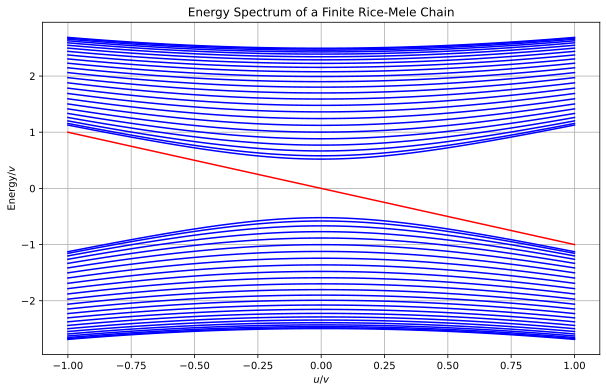

In [3]:
# Define parameters
num_sites = 51  # Total number of sites
v = 1.0 # Intracell hopping parameter
w = 1.5 # Intercell hopping parameter
u_list = np.linspace(-1, 1, 100)   # Onsite potential

# Initialize an array to store energy values for each w/v
energy_spectrum = np.zeros((len(u_list), num_sites))

# Calculate the energy spectrum for each w/v
for i, u in enumerate(u_list):
    eigenvalues, eigenvectors = np.linalg.eigh(riceHamiltonian(num_sites, w, v, u))
    energy_spectrum[i, :] = eigenvalues

# Plot the energy spectrum vs. u/v
plt.figure(figsize=(10, 6))
for i in range(num_sites):
    if np.any(energy_spectrum[:, i] > 0) & np.any(energy_spectrum[:, i] < 0):
        plt.plot(u_list/v, energy_spectrum[:, i]/v, color='red')
    else:
        plt.plot(u_list/v, energy_spectrum[:, i]/v, color='blue')

plt.xlabel('$u/v$')
plt.ylabel('Energy/$v$')
plt.title('Energy Spectrum of a Finite Rice-Mele Chain')
plt.grid(True)

## Charge pump cycle

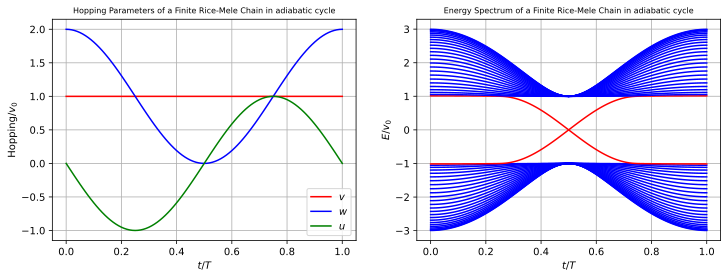

In [4]:
# Define parameters
num_sites = 50  # Total number of sites
t_list = np.linspace(0, 1, 101)  # t/T
v = 1.0 # Intracell hopping parameter

# Initialize an array to store energy values for each w/v
energy_spectrum = np.zeros((len(t_list), num_sites))

# Calculate the energy spectrum for each w/v
for i, t in enumerate(t_list):
    w = v * (1 + np.cos(2 * np.pi * t)) # Intercell hopping parameter
    u = -v * np.sin(2 * np.pi * t)   # Onsite potential
    eigenvalues, eigenvectors = np.linalg.eigh(riceHamiltonian(num_sites, w, v, u))
    energy_spectrum[i, :] = eigenvalues


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t_list, np.linspace(1,1,len(t_list)), color='red')
axes[0].plot(t_list, (1 + np.cos(2 * np.pi * t_list)), color='blue')
axes[0].plot(t_list, - np.sin(2 * np.pi * t_list), color='green')
axes[0].set_xlabel('$t/T$')
axes[0].set_ylabel('Hopping/$v_0$')
axes[0].set_title('Hopping Parameters of a Finite Rice-Mele Chain in adiabatic cycle', fontsize=8)
axes[0].legend(['$v$', '$w$', '$u$'])
axes[0].grid(True)

# Plot the energy spectrum vs. t/T
for i in range(num_sites):
    if np.any(energy_spectrum[:, i] > -1) & np.any(energy_spectrum[:, i] < 1):
        axes[1].plot(t_list, energy_spectrum[:, i]/v, color='red')
    else:
        axes[1].plot(t_list, energy_spectrum[:, i]/v, color='blue')

axes[1].set_xlabel('$t/T$')
axes[1].set_ylabel('$E/v_0$')
axes[1].set_title('Energy Spectrum of a Finite Rice-Mele Chain in adiabatic cycle', fontsize=8)
axes[1].grid(True)